In [ ]:
! pip install pandas

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [1]:
# mnist
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [2]:
# GPU
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU State:', device)

GPU State: cpu


In [3]:
transform = transforms.Compose(
    [lambda img : transforms.functional.rotate(img,-90),
     lambda img : transforms.functional.hflip(img),
     transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])


trainSet = torchvision.datasets.EMNIST(root="data/", split="byclass", download=True, train=True, transform=transform)              
testSet = torchvision.datasets.EMNIST(root="data/", split="byclass", download=True, train=False, transform=transform)
trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=64, shuffle=True)
testLoader = torch.utils.data.DataLoader(testSet, batch_size=64, shuffle=False)

  0%|          | 0/561753746 [00:00<?, ?it/s]

Extracting data/EMNIST/raw/gzip.zip to data/EMNIST/raw


In [4]:
trainSet

Dataset EMNIST
    Number of datapoints: 697932
    Root location: data/
    Split: Train
    StandardTransform
Transform: Compose(
               <function <lambda> at 0x7f971a12ecb0>
               <function <lambda> at 0x7f971a12eb00>
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [5]:
testSet

Dataset EMNIST
    Number of datapoints: 116323
    Root location: data/
    Split: Test
    StandardTransform
Transform: Compose(
               <function <lambda> at 0x7f971a12ecb0>
               <function <lambda> at 0x7f971a12eb00>
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [6]:
print("Total No of Images in EMNIST dataset:", len(trainSet) + len(testSet))
print("No of images in Training dataset:    ",len(trainSet))
print("No of images in Testing dataset:     ",len(testSet))
l = trainSet.classes
l.sort()
print("No of classes: ",len(l))
print("List of all classes")
print(l)
classes=l

Total No of Images in EMNIST dataset: 814255
No of images in Training dataset:     697932
No of images in Testing dataset:      116323
No of classes:  62
List of all classes
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


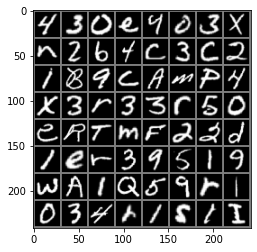

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
for i, data in enumerate(trainLoader, 1):
  images, labels = data
  break

# show images
imshow(torchvision.utils.make_grid(images))

In [8]:
print(images.shape)

torch.Size([64, 1, 28, 28])


In [16]:
import torch.nn as nn
import torch.nn.functional as F

#進來的圖片是(4,3,32,32) batchsize,rgb,height,width
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784,600)
        self.bn1 = nn.BatchNorm1d(num_features=600)
        self.fc6 = nn.Linear(600,500)
        self.fc2 = nn.Linear(500,350)
        self.fc3 = nn.Linear(350,200)
        self.bn2 = nn.BatchNorm1d(num_features=200)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(200,100)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc5 = nn.Linear(100,62)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.bn1(x)
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.bn2(x)
        x = self.dropout1(x)
        x = F.relu(self.fc4(x))
        x = self.dropout2(x)
        x = F.leaky_relu(self.fc5(x))
        return x

net = Net().to(device)
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=600, bias=True)
  (bn1): BatchNorm1d(600, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc6): Linear(in_features=600, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=350, bias=True)
  (fc3): Linear(in_features=350, out_features=200, bias=True)
  (bn2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=200, out_features=100, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc5): Linear(in_features=100, out_features=62, bias=True)
)


In [17]:
tensor_dict = net.state_dict()
tensor_list = list(tensor_dict.items())
print('\nModel Parameters:')
for layer_tensor_name, tensor in tensor_list:
    print('Layer {}: {} elements'.format(layer_tensor_name, torch.numel(tensor)))


Model Parameters:
Layer fc1.weight: 470400 elements
Layer fc1.bias: 600 elements
Layer bn1.weight: 600 elements
Layer bn1.bias: 600 elements
Layer bn1.running_mean: 600 elements
Layer bn1.running_var: 600 elements
Layer bn1.num_batches_tracked: 1 elements
Layer fc6.weight: 300000 elements
Layer fc6.bias: 500 elements
Layer fc2.weight: 175000 elements
Layer fc2.bias: 350 elements
Layer fc3.weight: 70000 elements
Layer fc3.bias: 200 elements
Layer bn2.weight: 200 elements
Layer bn2.bias: 200 elements
Layer bn2.running_mean: 200 elements
Layer bn2.running_var: 200 elements
Layer bn2.num_batches_tracked: 1 elements
Layer fc4.weight: 20000 elements
Layer fc4.bias: 100 elements
Layer fc5.weight: 6200 elements
Layer fc5.bias: 62 elements


In [18]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

optimizer = optim.Adam(net.parameters(), lr=0.002)
# optim.Adam(net.parameters(), lr=0.001)
x = []
y = []

In [19]:
for epoch in range(5):  # loop over the dataset multiple times
    x.append(epoch)
    running_loss = 0.0
    for i, data in enumerate(trainLoader, 1):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        inputs = inputs.view(inputs.shape[0], -1)
        # zero the parameter gradients
        optimizer.zero_grad()
        

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 5000 == 4999:    # print every 5000 batch
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 5000))
            y.append(running_loss / 5000)
            running_loss = 0.0
            
print('Finished Training')

[1,  5000] loss: 0.891
[1, 10000] loss: 0.619
[2,  5000] loss: 0.547
[2, 10000] loss: 0.526
[3,  5000] loss: 0.495
[3, 10000] loss: 0.486
[4,  5000] loss: 0.465
[4, 10000] loss: 0.465
[5,  5000] loss: 0.448
[5, 10000] loss: 0.449
Finished Training


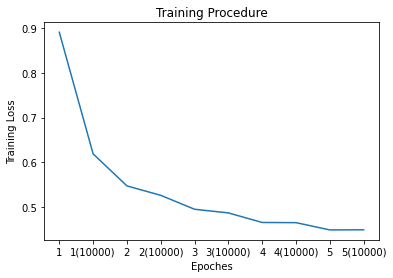

In [20]:
import matplotlib.pyplot as plt
x=np.array([1,2,3,4,5,6,7,8,9,10])
plt.xlabel('Epoches')
plt.ylabel('Training Loss')
plt.title('Training Procedure')
plt.xticks(x, ['1', '1(10000)','2', '2(10000)','3', '3(10000)','4', '4(10000)','5', '5(10000)'])

plt.plot(x,y)
plt.show()

In [21]:
# Test
correct = 0
total = 0
class_correct = [0 for i in range(62)]
class_total = [0 for i in range(62)]

for i, data in enumerate(testLoader, 1):
    with torch.no_grad():
      inputs, labels = data[0].to(device), data[1].to(device)
      inputs = inputs.view(inputs.shape[0], -1)
      outputs = net(inputs)
      _, predicted = torch.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      c = (predicted == labels)
      for i in range(len(labels)):
        label = labels[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1
        # print(class_correct)
        # print(class_total)

print('Accuracy of the network on the 10000 test images: %d %%' % (100*correct / total))

for i in range(62):
    print('Accuracy of %d: %3f' % (i, (class_correct[i]/class_total[i])))

Accuracy of the network on the 10000 test images: 84 %
Accuracy of 0: 0.764798
Accuracy of 1: 0.921011
Accuracy of 2: 0.963026
Accuracy of 3: 0.972190
Accuracy of 4: 0.958712
Accuracy of 5: 0.889017
Accuracy of 6: 0.964592
Accuracy of 7: 0.986969
Accuracy of 8: 0.966980
Accuracy of 9: 0.976785
Accuracy of 10: 0.940678
Accuracy of 11: 0.833333
Accuracy of 12: 0.924669
Accuracy of 13: 0.824134
Accuracy of 14: 0.867215
Accuracy of 15: 0.925000
Accuracy of 16: 0.785235
Accuracy of 17: 0.882917
Accuracy of 18: 0.523438
Accuracy of 19: 0.870607
Accuracy of 20: 0.740838
Accuracy of 21: 0.882716
Accuracy of 22: 0.914478
Accuracy of 23: 0.945226
Accuracy of 24: 0.576516
Accuracy of 25: 0.932713
Accuracy of 26: 0.813559
Accuracy of 27: 0.877627
Accuracy of 28: 0.916192
Accuracy of 29: 0.928934
Accuracy of 30: 0.971029
Accuracy of 31: 0.378141
Accuracy of 32: 0.790323
Accuracy of 33: 0.576389
Accuracy of 34: 0.796992
Accuracy of 35: 0.461207
Accuracy of 36: 0.888686
Accuracy of 37: 0.793669
Accur

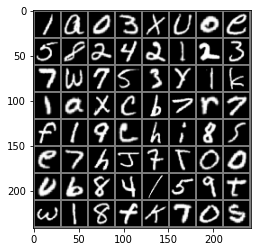

    1,    a,    0,    3,    X,    U,    O,    e,    5,    8,    2,    4,    2,    1,    2,    3,    7,    W,    7,    5,    3,    Y,    1,    k,    I,    a,    X,    C,    b,    7,    r,    7,    F,    1,    9,    C,    h,    i,    8,    S,    e,    7,    h,    J,    7,    T,    0,    0,    U,    6,    8,    4,    1,    5,    9,    t,    w,    1,    8,    t,    K,    7,    0,    S


In [22]:
for i, data in enumerate(testLoader, 1):
  with torch.no_grad():
    images, labels = data
    inputs, labels = data[0].to(device), data[1].to(device)
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = net(inputs)
    _, predicted = torch.max(outputs, 1)
    break

# show images
imshow(torchvision.utils.make_grid(images))
print(','.join('%5s' % classes[j] for j in predicted.cpu().numpy()))

In [24]:
#存模型參數
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [43]:
net.load_state_dict(torch.load(PATH))
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=600, bias=True)
  (bn1): BatchNorm1d(600, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc6): Linear(in_features=600, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=350, bias=True)
  (fc3): Linear(in_features=350, out_features=200, bias=True)
  (bn2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=200, out_features=100, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc5): Linear(in_features=100, out_features=62, bias=True)
)


In [44]:
from sklearn.metrics import confusion_matrix 

confusion_matrix = torch.zeros(len(classes), len(classes))
gendata = enumerate(testLoader,1)


In [45]:
for i, (data, label) in gendata:
  # inputs, label = data.to(device), data[1].to(device)
  inputs = data.to(device)
  labels = label.to(device)
  inputs = inputs.view(inputs.shape[0], -1)
  outputs = net(inputs)

  _, preds = torch.max(outputs, 1)
  for t, p in zip(label.view(-1), preds.view(-1)):
    # print(t, p)
    confusion_matrix[t.long(), p.long()] += 1


print(confusion_matrix)
print(confusion_matrix.diag()/confusion_matrix.sum(1))

tensor([[4.4070e+03, 1.0000e+00, 4.0000e+00,  ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        [1.0000e+00, 5.8460e+03, 2.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.0000e+00, 5.0000e+00, 5.6530e+03,  ..., 0.0000e+00, 0.0000e+00,
         7.4000e+01],
        ...,
        [0.0000e+00, 0.0000e+00, 1.0000e+00,  ..., 3.5000e+02, 3.0000e+00,
         4.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 5.3000e+01,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.1500e+02,  ..., 5.0000e+00, 1.0000e+00,
         2.5600e+02]])
tensor([0.7627, 0.9235, 0.9632, 0.9724, 0.9575, 0.8900, 0.9653, 0.9876, 0.9650,
        0.9763, 0.9416, 0.8503, 0.9155, 0.8139, 0.8660, 0.9257, 0.7696, 0.8848,
        0.5361, 0.8562, 0.7618, 0.8765, 0.9131, 0.9489, 0.5772, 0.9177, 0.8232,
        0.8850, 0.9162, 0.9315, 0.9655, 0.3844, 0.7903, 0.5741, 0.7945, 0.4612,
        0.9009, 0.8054, 0.0000, 0.9578, 0.9695, 0.0425, 0.3056, 0.9222, 0.3208,
    

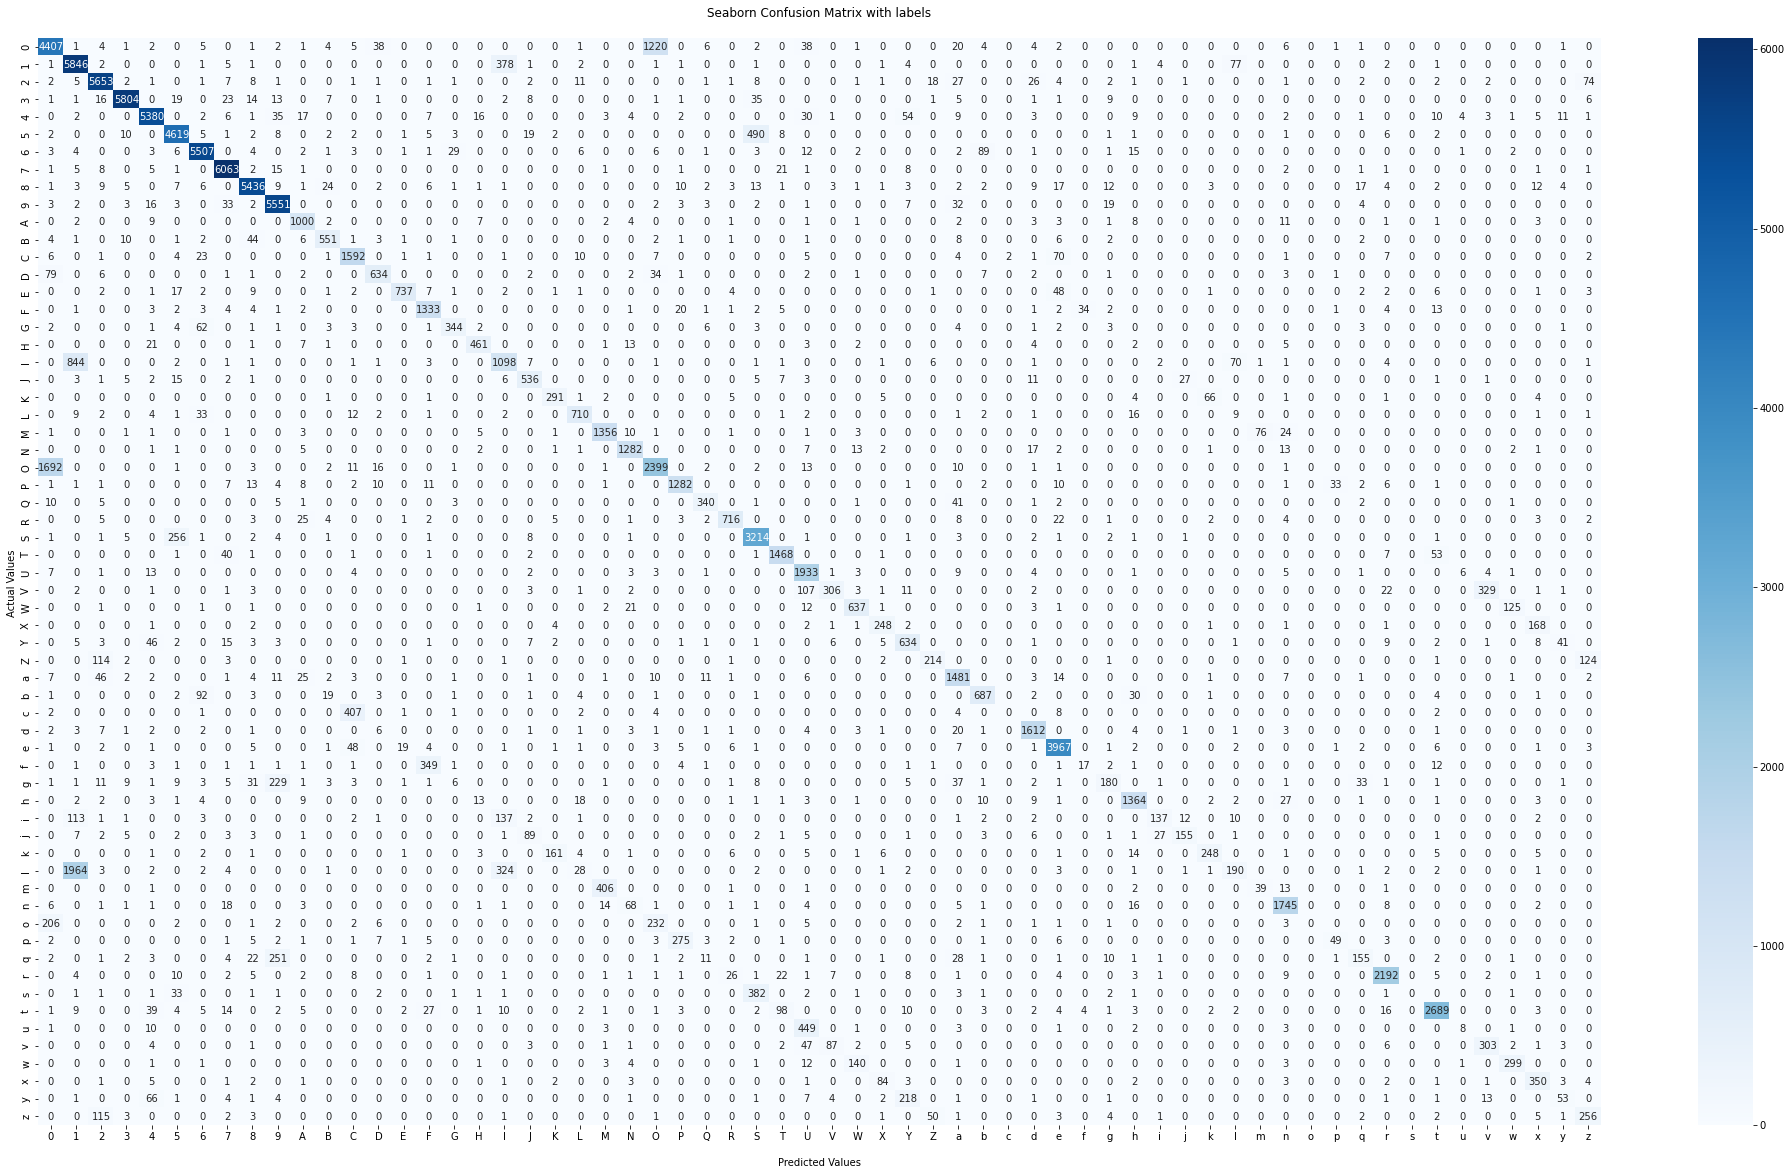

In [57]:
import pandas as pd
import seaborn as sns

plt.figure(figsize = (35,20))
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(confusion_matrix, t, p)  
# plt.show()

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(classes)
ax.yaxis.set_ticklabels(classes)

## Display the visualization of the Confusion Matrix.
plt.show()

<Figure size 720x576 with 0 Axes>